# 6.5 Unsupervised Machine Learning

## Import libraries and data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [4]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
# Define path

path = r'C:\Users\lefev\Documents\Data Analytics Course\Achievement 6'

In [6]:
# Import data

df = pd.read_csv(os.path.join(path, 'Data', 'combined_happiness_data.csv'), index_col=False)

## Clean and standardize data

In [8]:
# Check columns that are categorical

df.head()

Happiness Rank      Country  Score  GDP per capita  Social support  \
0             1.0  Switzerland  7.587         1.39651         1.34951   
1             2.0      Iceland  7.561         1.30232         1.40223   
2             3.0      Denmark  7.527         1.32548         1.36058   
3             4.0       Norway  7.522         1.45900         1.33095   
4             5.0       Canada  7.427         1.32629         1.32261   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                  0.94143                       0.66557     0.41978   
1                  0.94784                       0.62877     0.14145   
2                  0.87464                       0.64938     0.48357   
3                  0.88521                       0.66973     0.36503   
4                  0.90563                       0.63297     0.32957   

   Perceptions of corruption  Year Happiness Level  
0                    0.29678  2015            High  
1                    0.43630  2015            High  
2                    0.34139  2015            High  
3                    0.34699  2015            High  
4                    0.45811  2015            High

In [9]:
# Drop the categorical columns and Happiness Rank as it's redundant to the Score

df = df.drop(['Country', 'Year', 'Happiness Level', 'Happiness Rank',], axis=1)

In [20]:
df.head()

Score  GDP per capita  Social support  Healthy life expectancy  \
0  7.587         1.39651         1.34951                  0.94143   
1  7.561         1.30232         1.40223                  0.94784   
2  7.527         1.32548         1.36058                  0.87464   
3  7.522         1.45900         1.33095                  0.88521   
4  7.427         1.32629         1.32261                  0.90563   

   Freedom to make life choices  Generosity  Perceptions of corruption  
0                       0.66557     0.41978                    0.29678  
1                       0.62877     0.14145                    0.43630  
2                       0.64938     0.48357                    0.34139  
3                       0.66973     0.36503                    0.34699  
4                       0.63297     0.32957                    0.45811

In [22]:
# Standardize the Score column to the rest of the data so it's on the same scale 

# Standard scaling (mean=0, std=1)
from sklearn.preprocessing import StandardScaler
df['Score'] = StandardScaler().fit_transform(df[['Score']])

In [24]:
# Check results 

print("Mean:", df['Score'].mean())  # Should be close to 0
print("Std:", df['Score'].std())    # Should be close to 1

Mean: -6.905530424266958e-16
Std: 1.0006400000655151


In [34]:
# Drop the 1 missing value 

df_clean = df.dropna()

## Data is good to go

## Run the elbow technique

C:\Users\lefev\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\lefev\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\lefev\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\lefev\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

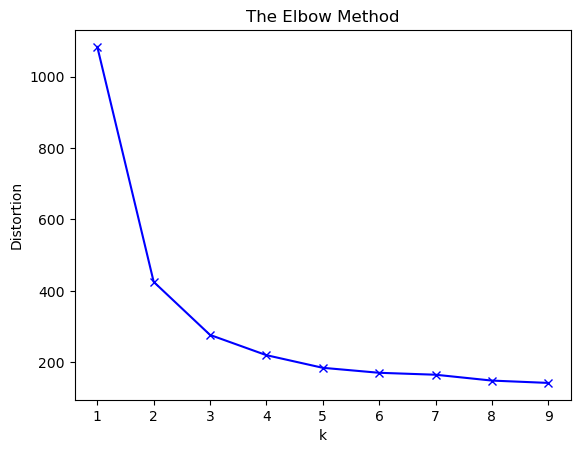

In [48]:
# Define range of clusters
num_cl = range(1, 10)

# Create and fit KMeans models
distortions = []
for i in num_cl:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_clean)
    distortions.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(num_cl, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

## Looking at the elbow plot, k=3 would be optimal - the distortion curve shows a clear "elbow" around that point.

## Run a k-means clustering 

In [56]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [58]:
# Fit the k-means object to the data.

kmeans.fit(df_clean)

C:\Users\lefev\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3)

In [62]:
df_clean['clusters'] = kmeans.fit_predict(df_clean)

C:\Users\lefev\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\lefev\AppData\Local\Temp\ipykernel_14868\3987554626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['clusters'] = kmeans.fit_predict(df_clean)


In [64]:
df_clean.head()

Score  GDP per capita  Social support  Healthy life expectancy  \
0  1.959628         1.39651         1.34951                  0.94143   
1  1.936552         1.30232         1.40223                  0.94784   
2  1.906377         1.32548         1.36058                  0.87464   
3  1.901939         1.45900         1.33095                  0.88521   
4  1.817625         1.32629         1.32261                  0.90563   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                       0.66557     0.41978                    0.29678   
1                       0.62877     0.14145                    0.43630   
2                       0.64938     0.48357                    0.34139   
3                       0.66973     0.36503                    0.34699   
4                       0.63297     0.32957                    0.45811   

   clusters  
0         0  
1         0  
2         0  
3         0  
4         0

In [66]:
df_clean['clusters'].value_counts()

clusters
2    311
1    282
0    188
Name: count, dtype: int64

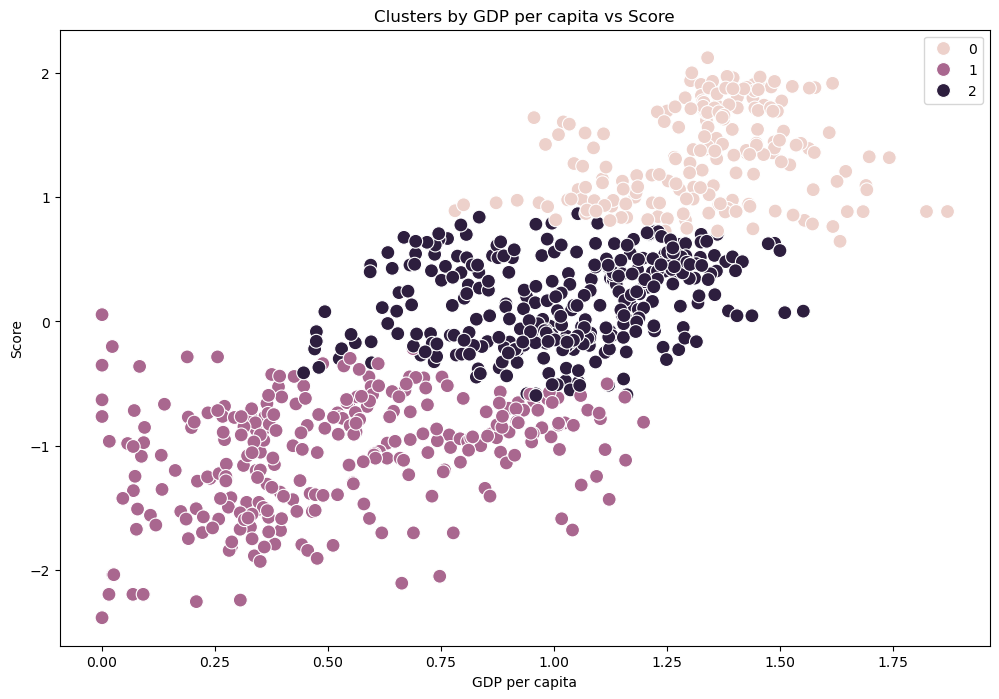

In [68]:
# Plot the clusters for the 'GDP per capita' and 'Score' variables 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean['GDP per capita'], y=df_clean['Score'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.title('Clusters by GDP per capita vs Score')
plt.show()

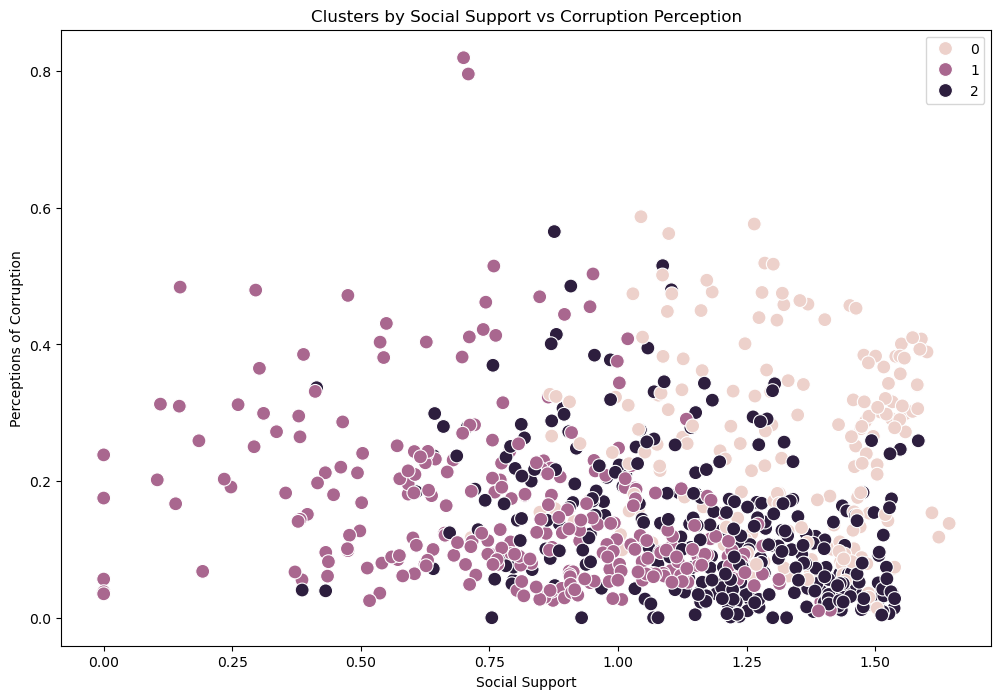

In [70]:
# Plot clusters for 'Social support' and 'Perceptions of corruption'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean['Social support'], y=df_clean['Perceptions of corruption'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Social Support')
plt.ylabel('Perceptions of Corruption')
plt.title('Clusters by Social Support vs Corruption Perception')
plt.show()

## The plots show a few things. For the GDP vs Score, we see a strong 3 clusters, Cluster 0 (pink): Highest GDP and happiness scores - likely wealthy, happy nations - Cluster 2 (dark): Middle range - emerging economies - Cluster 1 (purple): Lowest GDP and scores - developing nations.

## The plot of Social Support vs Corruption shows higher social support correlates with lower corruption perception. However it isn't so clear what the different clusters show as they are no so distinct from one another.

## Show descriptive statistics for the clusters

In [76]:
# Create cluster labels

df_clean.loc[df_clean['clusters'] == 2, 'cluster'] = 'dark purple'
df_clean.loc[df_clean['clusters'] == 1, 'cluster'] = 'purple'
df_clean.loc[df_clean['clusters'] == 0, 'cluster'] = 'pink'

# Get mean and median for relevant columns

df_clean.groupby('cluster').agg({
   'GDP per capita': ['mean', 'median'],
   'Score': ['mean', 'median'], 
   'Social support': ['mean', 'median'],
   'Perceptions of corruption': ['mean', 'median']
})

C:\Users\lefev\AppData\Local\Temp\ipykernel_14868\3322851366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[df_clean['clusters'] == 2, 'cluster'] = 'dark purple'


GDP per capita               Score           Social support  \
                      mean    median      mean    median           mean   
cluster                                                                   
dark purple       1.019550  1.029000  0.157446  0.149975       1.176059   
pink              1.335767  1.351841  1.326184  1.322389       1.322071   
purple            0.517904  0.474000 -1.062151 -0.965194       0.809302   

                      Perceptions of corruption            
               median                      mean    median  
cluster                                                    
dark purple  1.215000                  0.124182  0.099000  
pink         1.358790                  0.244873  0.247842  
purple       0.847915                  0.158253  0.119152

## These results can help with future predictive modeling and trend analysis. Such as creating cluster specific models or potentially tracking counties that change between clusters